In [ ]:
pip install --upgrade httplib2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


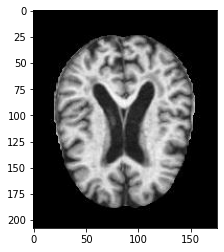

In [ ]:
DataDir='/content/drive/My Drive/Alzheimer_Labelled_Dataset/train'
Categories=['MildDemented','NonDemented','VeryMildDemented']

for category in Categories:
  path=os.path.join(DataDir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    #print(os.path.join(path,img))
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break


In [ ]:
print(img_array.shape)
cv2.imread('/content/drive/My Drive/Alzheimer_Labelled_Dataset/train/MildDemented/mildDem536.jpg').shape

(208, 176)


(208, 176, 3)

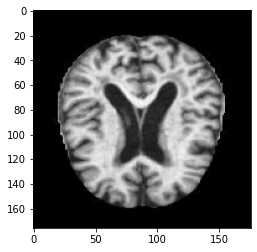

In [ ]:
Img_Width=176
Img_Height=176
new_array=cv2.resize(img_array,(Img_Width,Img_Height))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]

In [ ]:
def create_training_data():
  for category in Categories:
    path=os.path.join(DataDir,category)
    class_num=Categories.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(Img_Width,Img_Height))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()
print(len(training_data))

100%|██████████| 717/717 [04:54<00:00,  2.43it/s]

2151


In [ ]:
#print(os.listdir('.'))
import random
random.shuffle(training_data)

In [ ]:
for i in training_data[:10]:
  print(i[1])

0
0
2
1
1
0
2
0
2
0


In [ ]:
x=[]
y=[]
#y=np.array(y)

In [ ]:
for features,label in training_data:
  #print(features,label)
  x.append(features)
  y.append(label)
  #np.array((y,label))

In [ ]:
#print(x[0].reshape(-1,Img_Width,Img_Height,1))

In [ ]:
from keras.utils import to_categorical

x=np.array(x).reshape(-1, Img_Width, Img_Height, 1)
y=np.array(y)

print('Y type before: ',y.dtype)
print(y)

y = to_categorical(y, 3)
print('Y type after: ',y.dtype)
print(y)

Y type before:  int64
[0 0 2 ... 1 2 0]
Y type after:  float32
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
'''
import sys
np.set_printoptions(threshold=sys.maxsize)
cv2.imread('/content/drive/My Drive/Alzheimer_Labelled_Dataset/train/MildDemented/mildDem536.jpg')
print(x[1])
'''

In [ ]:
#all the pickle code is to store the variables so that it would be used further in future.
import pickle

In [ ]:
pickle_out=open('training_data.pickle','wb')
pickle.dump(training_data,pickle_out)
pickle_out.close()

In [ ]:
pickle_out=open('x_176x176.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open('y_176x176.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

os.listdir('.')

['.config',
 'adc.json',
 'x_176x176.pickle',
 'x_test.pickle',
 'y_176x176.pickle',
 '.ipynb_checkpoints',
 'drive',
 'training_data.pickle',
 'y_test.pickle',
 'sample_data']

In [ ]:
'''
pickle_in = open('/content/drive/My Drive/PickleFiles/x.pickle','rb')
x = pickle.load(pickle_in)

pickle_in = open('/content/drive/My Drive/PickleFiles/y.pickle','rb')
y = pickle.load(pickle_in)
'''

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  


In [ ]:
# get the folder id where you want to save your file (create a folder on google drive. then right click and copy the id(from the share link) of folder and pasted it below)
file = drive.CreateFile({'parents':[{u'id': '1fCpvVR6huQWVr_La4Dh3Pyf45yR29nKt'}]})
file.SetContentFile('training_data.pickle')
file.Upload() 

In [ ]:
# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': '1fCpvVR6huQWVr_La4Dh3Pyf45yR29nKt'}]})
file.SetContentFile('x.pickle')
file.Upload() 

In [ ]:
# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': '1fCpvVR6huQWVr_La4Dh3Pyf45yR29nKt'}]})
file.SetContentFile('y.pickle')
file.Upload()

In [ ]:
print('X type before: ',x.dtype)
x=x/255.0

X type before:  uint8


In [ ]:
print('X type after: ',x.dtype)

X type after:  float64


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(x[0])
#print(y[15:25])


[[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.0000000

In [ ]:
activation='relu'
model = Sequential([
    Conv2D(16, 3, padding='same', activation=activation, input_shape=x.shape[1:]),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(32, 3, padding='same', activation=activation),
    MaxPooling2D(),
    
    Conv2D(64, 3, padding='same', activation=activation),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(128, 3, padding='same', activation=activation),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(128, 3, padding='same', activation=activation),
    MaxPooling2D(),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation=activation),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#model.fit(x, y, batch_size=67, epochs=10, validation_split=0.3)
#history=model.fit(x, y, epochs=30, validation_split=0.3) #loss: 0.2999 - accuracy: 0.8777 - val_loss: 0.3308 - val_accuracy: 0.8762 (for 7 layers)
#history=model.fit(x, y, epochs=40, validation_split=0.1) #loss: 0.1474 - accuracy: 0.9457 - val_loss: 0.0974 - val_accuracy: 0.9722  (for 7 layers)
#history=model.fit(x, y, epochs=40, validation_split=0.1) #loss: 0.0477 - accuracy: 0.9876 - val_loss: 0.1120 - val_accuracy: 0.9676 (max was 98 % and layers were 6)
#history=model.fit(x, y, epochs=40, validation_split=0.1) #loss: 0.0162 - accuracy: 0.9959 - val_loss: 0.0316 - val_accuracy: 0.9907 (for 5 layers)
history=model.fit(x, y, epochs=30, validation_split=0.3)

Epoch 1/30
48/48 [==============================] - 68s 1s/step - loss: 1.1202 - accuracy: 0.3309 - val_loss: 1.0984 - val_accuracy: 0.3251
Epoch 2/30
48/48 [==============================] - 68s 1s/step - loss: 1.0562 - accuracy: 0.4226 - val_loss: 0.9229 - val_accuracy: 0.5557
Epoch 3/30
48/48 [==============================] - 69s 1s/step - loss: 0.8859 - accuracy: 0.5110 - val_loss: 0.8781 - val_accuracy: 0.5232
Epoch 4/30
48/48 [==============================] - 73s 2s/step - loss: 0.8548 - accuracy: 0.5628 - val_loss: 0.8624 - val_accuracy: 0.5341
Epoch 5/30
48/48 [==============================] - 67s 1s/step - loss: 0.8265 - accuracy: 0.5754 - val_loss: 0.8638 - val_accuracy: 0.5108
Epoch 6/30
48/48 [==============================] - 67s 1s/step - loss: 0.8386 - accuracy: 0.5588 - val_loss: 0.8309 - val_accuracy: 0.5851
Epoch 7/30
48/48 [==============================] - 69s 1s/step - loss: 0.7918 - accuracy: 0.6140 - val_loss: 0.8030 - val_accuracy: 0.5929
Epoch 8/30
48/48 [==

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['loss'],
                         mode='lines+markers',
                         name='Training loss'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_loss'],
                         mode='lines+markers',
                         name='Validation loss'))
fig.update_layout(title='Loss',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
#To save the model
model.save('/content/drive/My Drive/Trained_model/Alzheimer_Stage_detection_2.h5')

In [ ]:
#To load the existing trained model
from keras.models import load_model
new_model=load_model('/content/drive/My Drive/Trained_model/Alzheimer_Stage_detection_2.h5')

new_model.summary()
new_model.optimizer
#new_model.get_weights()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 176, 208, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 88, 104, 16)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 88, 104, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 88, 104, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 44, 52, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 26, 64)       

In [ ]:
#testing a single input image
from sklearn.preprocessing import MinMaxScaler

test_sample='/content/drive/My Drive/test_balanced_dataset/test/NonDemented/26 (73).jpg'
width=176
height=176
test=[]
img_array1 = cv2.imread(test_sample, cv2.IMREAD_GRAYSCALE) 
new_array1 = cv2.resize(img_array1, (width, height))  
new_array2=new_array1.reshape(-1, width, height, 1)  
test.append(new_array2)
#print(test)
test=np.array(test).reshape(-1, width, height, 1)
test=test/255.0
scaler=MinMaxScaler(feature_range=(0,1))
scaler_test=scaler.fit_transform((test).reshape(-1,1))
temp=new_model.predict(test,batch_size=1)
print('prediction :',temp)

#print('scaler test shape: ',scaler_test.shape)
#predictions=model.predict_classes(scaler_test)
#print(test.shape)
#new_array2 = np.expand_dims(new_array2, axis=-1)
#prediction = new_model.predict_classes(new_array2,batch_size=10)

prediction : [[1.000000e+00 2.529246e-15 6.858955e-17]]


In [ ]:
###########The COde from here onwards is for generating the testing_data with the same procedure as we did for training_data

DataTestDir='/content/drive/My Drive/test_balanced_dataset/test'
Categories=['MildDemented','NonDemented','VeryMildDemented']
testing_data=[]
width=176
height=208

def create_testing_data():
  for category in Categories:
    path=os.path.join(DataTestDir,category)
    class_num=Categories.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(width,height))
        testing_data.append([new_array,class_num])
      except Exception as e:
        pass

create_testing_data()
print(len(testing_data))

100%|██████████| 179/179 [00:00<00:00, 271.43it/s]

537


In [ ]:
print(os.listdir('.'))
import random
random.shuffle(testing_data)

for i in testing_data[:20]:
  print(i[1])

['.config', 'drive', 'sample_data']
2
0
2
1
0
2
2
2
2
0
2
0
1
1
0
1
2
2
1
1


In [ ]:
x_test=[]
y_test=[]

for features,label in testing_data:
  #print(features,label)
  x_test.append(features)
  y_test.append(label)

In [ ]:
from keras.utils import to_categorical

x_test=np.array(x_test).reshape(-1, width, height, 1)
y_test=np.array(y_test)

print('Y type before: ',y_test.dtype)
print(y_test)

y_test = to_categorical(y_test, 3)
print('Y type after: ',y_test.dtype)
print(y_test)

Y type before:  int64
[2 0 2 1 0 2 2 2 2 0 2 0 1 1 0 1 2 2 1 1 1 2 0 2 1 1 2 2 0 1 2 1 1 2 0 2 0
 1 0 1 0 1 0 1 1 0 1 1 1 2 2 1 2 2 2 0 2 1 2 1 0 1 2 2 2 1 2 0 1 1 1 1 0 1
 1 2 2 1 1 0 1 0 1 0 1 0 1 1 0 2 0 0 0 1 0 2 1 1 0 1 1 0 2 1 0 0 1 2 2 2 0
 1 0 1 0 0 1 1 2 2 0 2 2 2 1 2 2 1 2 2 2 2 2 1 2 1 1 2 0 1 0 2 0 0 0 0 0 2
 2 0 1 1 1 2 2 0 0 1 2 2 0 0 1 1 2 2 1 0 0 2 0 1 2 2 0 2 1 0 0 2 2 0 0 1 0
 1 1 1 1 1 2 0 1 2 2 0 1 2 0 2 1 1 2 0 2 1 1 2 1 2 2 1 0 0 1 0 0 2 2 1 1 0
 2 2 2 1 0 2 0 2 2 2 0 2 0 0 1 0 2 0 1 2 2 1 2 1 2 1 0 2 0 0 1 2 2 1 2 0 1
 1 2 2 0 0 2 0 0 2 0 2 1 1 1 1 1 1 2 2 0 0 2 0 2 0 1 0 0 0 1 1 1 2 2 0 0 1
 0 1 0 0 2 0 0 2 1 0 1 2 1 2 2 1 2 0 0 1 1 2 2 0 2 1 0 0 0 2 2 0 1 2 0 1 1
 2 1 2 2 0 2 2 2 2 0 0 0 0 1 2 0 2 1 2 0 0 2 0 2 1 0 1 2 1 2 1 0 1 0 2 2 0
 2 2 0 1 1 2 2 0 1 2 1 1 1 2 2 1 1 0 0 1 0 2 0 2 2 2 2 1 1 2 0 0 2 0 1 0 2
 2 0 0 2 1 1 1 1 0 0 2 2 1 0 2 1 2 0 1 0 1 0 1 1 0 2 1 0 1 0 0 1 1 1 0 2 2
 0 1 1 1 2 1 1 1 0 2 0 2 0 0 2 1 0 1 1 2 1 0 0 2 0 0 0 2 2 1 0 1 1 2 1 0 2
 0 

In [ ]:
print('X type: ',x_test.dtype)
x_test=x_test/255.0
print('X type after: ',x_test.dtype)

X type:  uint8
X type after:  float64


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(x_test[0])
#print(y_test[15:25])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.     

In [ ]:
score = new_model.evaluate(x_test,y_test,batch_size=10)

54/54 [==============================] - 6s 105ms/step - loss: 19.6015 - accuracy: 0.3259


In [ ]:
new_model.metrics_names

['loss', 'accuracy']

In [ ]:
score

[19.601552963256836, 0.32588455080986023]